In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [7]:
cav_amps = np.loadtxt('amplitudes.csv')
cav_phases = np.loadtxt('cavityrange.csv')
bpmdata = np.loadtxt('bpmdata.csv',delimiter=',')

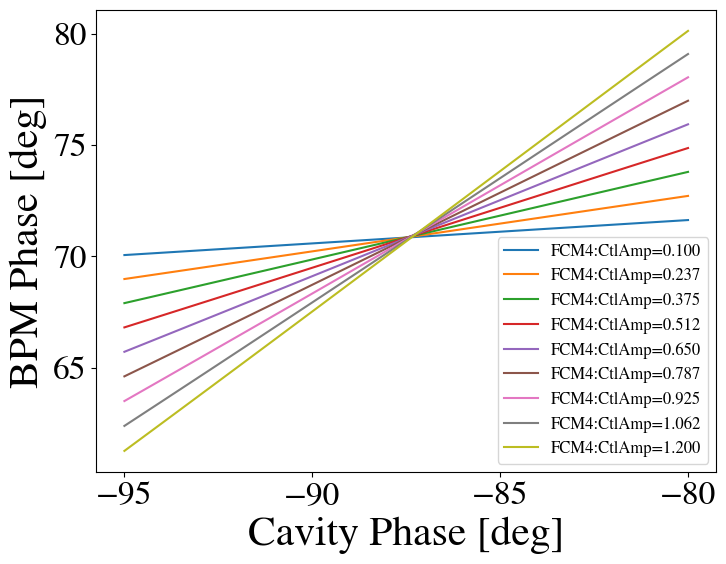

In [29]:
fig,ax = plt.subplots(1,1,figsize = (8,6))

for i,bpmdatai in enumerate(bpmdata):
    ax.plot(cav_phases,bpmdatai, label = 'FCM4:CtlAmp=%.3f'%cav_amps[i])

ax.set_xlabel('Cavity Phase [deg]',fontsize = 30)
ax.set_ylabel('BPM Phase [deg]',fontsize = 30)

ax.tick_params(axis='both',labelsize=24)

ax.legend(fontsize = 12)

plt.show()
plt.close()

In [21]:
slopes = []
intercepts = []

for i,ampi in enumerate(cav_amps):
    
    z = np.polyfit(cav_phases, bpmdata[i], 1)
    p = np.poly1d(z)
    
    slopes.append(z[0])
    intercepts.append(z[1])
    
slopes = np.array(slopes)
intercepts = np.array(intercepts)
    

In [45]:
xints = []
yints = []

for i in np.arange(len(slopes)):
    for j in np.arange(len(slopes)):
        if i!=j:
            x0 = (intercepts[i]-intercepts[j])/(slopes[j]-slopes[i])
            y0 = slopes[i]*x0 + intercepts[i]
            
            xints.append(x0)
            yints.append(y0)
            
xints = np.array(xints)
yints = np.array(yints)

phirf00 = np.mean(xints)
phibpm00 = np.mean(yints)

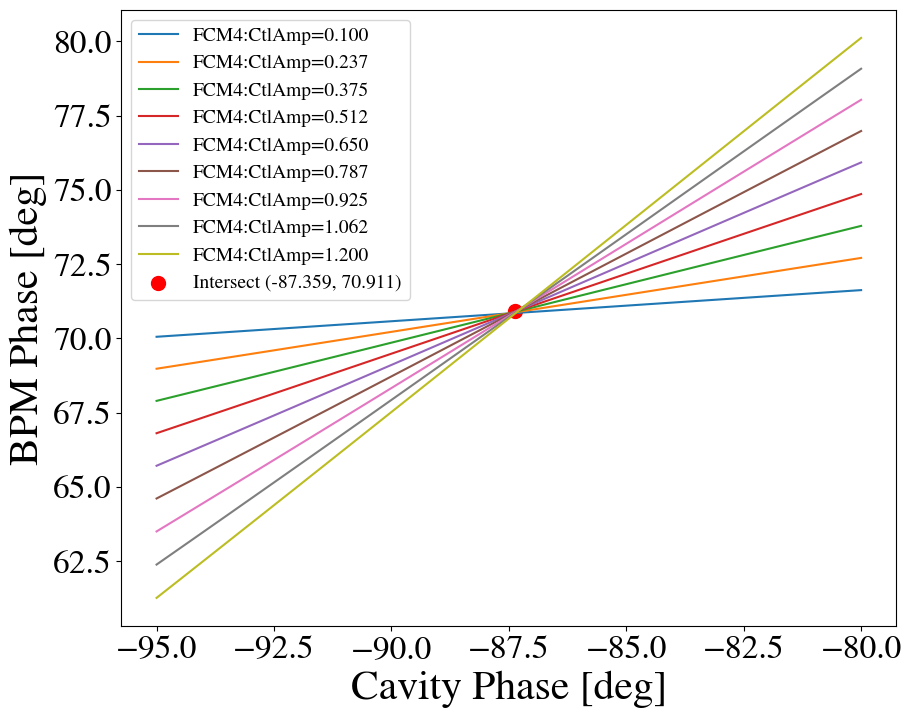

In [87]:
fig,ax = plt.subplots(1,1,figsize = (10,8))

for i,bpmdatai in enumerate(bpmdata):
    ax.plot(cav_phases,bpmdatai, label = 'FCM4:CtlAmp=%.3f'%cav_amps[i])

ax.scatter(phirf00,phibpm00,c='r',s=100, label = 'Intersect (%.3f, %.3f)'%(phirf00,phibpm00))

ax.set_xlabel('Cavity Phase [deg]',fontsize = 30)
ax.set_ylabel('BPM Phase [deg]',fontsize = 30)

ax.tick_params(axis='both',labelsize=24)

ax.legend(fontsize = 14)

plt.show()
plt.close()

In [50]:
e_kin_ini = 0.0025 # in [GeV]
mass = 0.939294    # in [GeV]
gamma = (mass + e_kin_ini)/mass
beta = np.sqrt(gamma*gamma - 1.0)/gamma
print ("relat. gamma=",gamma)
print ("relat.  beta=",beta)
bpm_frequency = 805.0e+6 # MHz
v_light = 2.99792458e+8  # in [m/sec]
s = 0.25 #m
L_dist =0.25

relat. gamma= 1.002661573479656
relat.  beta= 0.07281462907340505


In [59]:
qveffs = []
for slopei in slopes:
    
    qveffi = -slopei*v_light*(beta**3)*mass/(2*np.pi*bpm_frequency*s*np.sin(phirf00*np.pi/180))
    
    qveffs.append(qveffi)

qveffs = np.array(qveffs)*1e6

In [61]:
qveffs

array([  9.02131147,  21.42623414,  33.83223279,  46.23917957,
        58.64638886,  71.05373833,  83.46118508,  95.86792422,
       108.27390971])

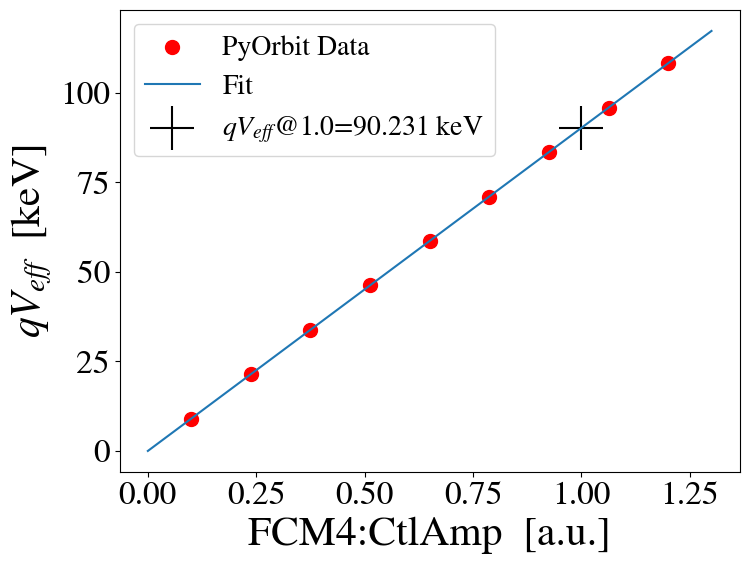

In [88]:
label = ['FCM4:CtlAmp=%.3f'%i for i in cav_amps]

fig,ax = plt.subplots(1,1,figsize = (8,6))

ax.scatter(cav_amps,qveffs,c='r',s=100, label = 'PyOrbit Data')

za = np.polyfit(cav_amps, qveffs, 1)
pa = np.poly1d(za)

xfit = np.linspace(0,1.3)
yfit = pa(xfit)
ax.plot(xfit, yfit,label = 'Fit')

ax.scatter([1],[pa[1]],marker='+',s=1000, color = 'black', label = r'$qV_{eff}$@$1.0$=%.3f keV'%pa[1])

ax.set_xlabel('FCM4:CtlAmp  [a.u.]',fontsize = 30)
ax.set_ylabel(r'$qV_{eff}$  [keV]',fontsize = 30)

ax.tick_params(axis='both',labelsize=24)

ax.legend(fontsize = 20)

plt.show()
plt.close()

In [72]:
pa(1)

182.01804088166054